# Découverte du epsilon numérique

Il existe principalement deux types de données flottantes
- le réel simple précision sur 32 bits (4 octets)
- le réel double précision sur 64 bits (8 octets)

Ces valeurs sont codées en base 2 selon la norme IEEE qui définit de manière complète le rôle de chacun des 32/64 bits dans la représentation mémoire de la valeur réelle.

Pour un nombre réel sur 64 bits, on a
- un bit de signe
- 11 bits d'exposant (sur une base de puissance de 2)
- 52 bits de mantisse

La mantisse est un nombre compris entre 0 et 1 et dont la valeur finale est évaluée en fonction des bits $b_1$, $b_2$ ... $b_{52}$ selon la formule
$$M=\sum_{i=1}^{52}\frac{1}{2^i}$$
Moyennant quoi la valeur finale du nombre est de la forme
$$x=\pm 2^{exposant}\times 1.M$$

Avec une telle représentation, le terme $2^{exposant}$ nous donne l'ordre de grandeur de la valeur, et $M$ ses décimales mais en valeur relative. Ainsi, la machine n'est pas en mesure de faire la distinction entre 
$$x_1=\pm 2^{exposant}\times 1.M$$
et
$$x_2=\pm 2^{exposant}\times 1.\left(M+2^{-53}\right)$$
pour lesquelles la différence en valeur absolue est $2^{exposant}\times 2^{-53}$.

On parle alors d'erreur de précision numérique dans la représentation de la variable $x$. Cette erreur est en valeur relative et dépend donc de l'ordre de grandeur de $x$.
- Dans le cas d'une valeur unitaire, l'erreur de précision absolue est $2^{-53}$,
- Dans le cas d'une valeur de l'ordre de $10^3$, l'erreur de précision absolue est de l'ordre de $2^{10}\times2^{-53}\simeq2^{-43}$
- Dans le cas d'une valeur de l'ordre de $10^{20}$, l'erreur de précision absolue est de l'ordre de $2^{66}\times2^{-53}\simeq2^{13}=8192$

## Premier exemple - évaluation du epsilon numérique

Le premier code que vous devez écrire ici est relativement simple :
- prenez une valeur de $x$ égale à 1
- calculer la plus petite valeur de $n$ entier telle que $x = x + 2^{-n}$ 
- refaire tourner le même code avec $x=10^3$, $x=10^6$, $x=10^9$, ...

In [11]:
from mpmath import *

print(mp)
mp.prec=53
x = mpf(1.)
n = 0
while x != x+2**(-n):
    n += 1
print(n)

Mpmath settings:
  mp.prec = 100               [default: 53]
  mp.dps = 29                 [default: 15]
  mp.trap_complex = False     [default: False]
53


## Deuxième exemple - la non-associativité de l'addition

Un autre exemple très simple et rapide à mettre en oeuvre consiste à montrer que l'addition n'est plus associative. Pour cela on va calculer $(a+b)+c$ et $a+(b+c)$ pour différentes valeurs de $a$, $b$ et $c$.

On pourra ainsi considérer les valeurs suivantes
- $a=10^n$
- $b=-10^n$
- $c=1$
pour différentes valeurs de l'entier $n$. Trouver en particulier à partir de quelle valeur de $n$ les deux expressions $(a+b)+c$ et $a+(b+c)$ diffèrent.

In [15]:
n = 0
a = 1.
b = 1.
c = 1.
A = (a+b)+c
B = a+(b+c)
while A == B:
    n+=1
    a = 10.**n # On oubli pas le point pour être en valeur décimale (sinon boucle infinie, le calcul est toujours fait en arithmétique entière donc est toujours vrai)
    b = -10.**n
    A = (a+b)+c 
    B = a+(b+c)
print(n)

16


## Troisième exemple - inversion d'un système simple

Le troisième exemple, très facile et rapide à coder et assez illustrateur de la problématique numérique, consiste à inverser un système linéaire 2x2 de la forme
$$
    (I)~\left\{\begin{array}
    xx_1+x_2 & = & 1 \\
    10^{-n}x_1+x_2 & = & 0.5 \\
    \end{array}\right.
~~~~~~~~~~
    (II)~\left\{\begin{array}
    110^{-n}x_1+x_2 & = & 0.5 \\
    x_1+x_2 & = & 1 \\
    \end{array}\right.
$$
A ces deux systèmes on applique la méthode dite du pivot de Gauss avec les étapes suivantes
- on garde inchangée la première équation, on retire à la deuxième équation un multiple de la première équation calculé de telle sorte que l'on élimine la dépendance en $x_1$
- le système étant alors triangulaire, on calcule $x_2$ de la deuxième équation
- on en déduit $x_1$

Ecrire un code qui met en oeuvre cet algorithme avec chacun des deux systèmes pour différentes valeurs de $n$. Que peut-on en déduire par rapport à la méthode de résolution d'un tel système ?

In [76]:
import numpy as np
N = [1,5,10,100]
# Système 1
print('Système 1')
for n in N:
    A = np.array([[1,1],[10.**(-n),1]])
    B = np.array([(1,0.5)])
    Diff_A = np.array([A[0,:],A[1,:]-10.**(-n)*A[0,:]])
    Diff_B = np.array([B[0,0],B[0,1]-B[0,0]*10.**(-n)])
    x1 = Diff_B[1]/Diff_A[1,1]
    x1 = Diff_B[0]-x2
    print('n =',n,'x1 =',x1,'x2 =',x2)

# Système 2
print('Système 2')
for n in N:
    A = np.array([[10.**(-n),1],[1,1]])
    B = np.array([(0.5,1)])
    Diff_A = np.array([A[0,:],A[1,:]-10.**(n)*A[0,:]])
    Diff_B = np.array([B[0,0],B[0,1]-B[0,0]*10.**(n)])
    x2 = Diff_B[1]/Diff_A[1,1]
    x1 = (Diff_B[0]-x2)*10.**(n)
    print('n =',n,'x1 =',x1,'x2 =',x2)   


Système 1
n = 1 x1 = 0.5 x2 = 0.5
n = 5 x1 = 0.5 x2 = 0.5
n = 10 x1 = 0.5 x2 = 0.5
n = 100 x1 = 0.5 x2 = 0.5
Système 2
n = 1 x1 = 0.5555555555555558 x2 = 0.4444444444444444
n = 5 x1 = 0.5000050000480982 x2 = 0.4999949999499995
n = 10 x1 = 0.5000000413701855 x2 = 0.49999999995
n = 100 x1 = 0.0 x2 = 0.5


## Calcul d'une série alternée

On s'intéresse ici au calcul de la série
$$S_N(x)=\sum_{n=0}^N(-1)^n\frac{x^{2n}}{2n!}$$
Dans un premier temps on ne se préoccupe pas de la convergence de la série, mais uniquement du calcul de la somme.

Ecrire un code Python permettant de calcul $S_N(x)$ pour une valeur de $x$ donnée (on pourra par exemple considérer $x=1.5$) :
- créer une fonction permettant de calculer $n!$
- créer une fonction permettant de calculer $u_n(x)=x^{2n}/2n!$
- calculer la somme $S_N(x)$
- évaluer et représenter graphiquement le temps de calcul en fonction de $N$
- quelle est la complexité numérique de ce calcul par rapport à $N$ ?

Réécrire le code précédent avec une complexité linéaire en $N$.
Pour atteindre la complexité linéaire il faut remarquer la relation de récurrence
$$u_{n+1}(x)=\frac{x^2}{(2n+2)(2n+1)}u_n(x)$$

Calculer
$$\sum_{n=0}^{+\infty}(-1)^n\frac{x^{2n}}{2n!}$$
en limitant le nombre de termes dans la somme par un critère de convergence adéquat. 
Comparer le résultat obtenu avec $\cos(x)$.

On fera ce calcul pour $x=1$, $x=5$, $x=10$, $x=25$, $x=50$. Commentaires ?

Afin de mieux comprendre la nature des résultats obtenus :
- comment varie $x^{2n}$ avec $n$ ?
- comment varie $1/2n!$ avec $n$ ?
- comment varie $u_n(x)$ avec $n$ ? on pourra ici utiliser une représentation graphique de $u_n(x)$ en fonction de $n$, par exemple pour $x=50$.

Conclusions ?

Avec le DL [2.462872201561461e-05, 0.0006153543210180421, 0.0024568817257137237, 0.015159967982147624, 0.05800194886548187] 
Avec le cos [mpf('0.54030230586813977'), mpf('0.28366218546322625'), mpf('-0.83907152907645244'), mpf('0.99120281186347359'), mpf('0.96496602849211333')]


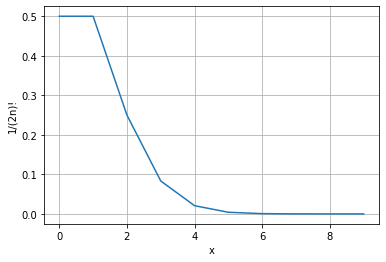

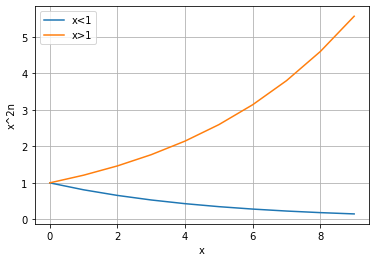

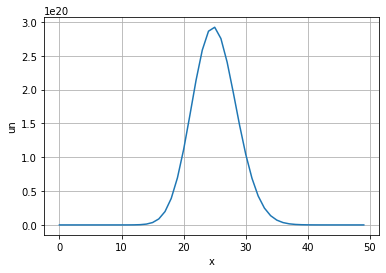

In [192]:
import time
import matplotlib.pyplot as plt
import numpy as np

case = 1

if case == 0:

    # Calcul de n factoriel
    def facto(n):
        if n == 0:
           fact = 1
        else:
           fact = facto(n-1)*n
        return fact

    # Calcul de un
    def un(x,n):
        return(x**(2*n)/facto(2*n))

    # Calcul de la somme
    def Somme(x,N):
        S = 0
        for k in range(N):
            S += (-1)**k*un(x,k)
        return(S)

    # Évaluation du temps de calcul
    N_list = [k for k in range(87)] # Fonctionne jusqu'à 87 (on ne peut pas aller plus loin que 170 avec n! donc 85 avec (2n)!
    S = []
    temps = []
    x = 1.4
    for N in N_list:
        t1 = time.time()
        S.append(Somme(x,N))
        t2 = time.time()
        temps.append(t2-t1)

    plt.plot(N_list,temps)

    # Complexité exponentielle

    def Somme_rec(x,N):
        S = 0
        u = 1
        for k in range(N):
            u = u*x**2/((2*n)*(2*n-1))
            S += (-1)**k*u
        return(S)

    N_list = [k for k in range(87)] # Fonctionne jusqu'à 87 (on ne peut pas aller plus loin que 170 avec n! donc 85 avec (2n)!) --> Overflow sur les nombres réels atteint vers 10^(308) soit 170!
    S = []
    temps = []
    x = 1.4
    for N in N_list:
        t1 = time.time()
        S.append(Somme_rec(x,N))
        t2 = time.time()
        temps.append(t2-t1)

    plt.plot(N_list,temps)
    plt.grid()
    plt.xlabel('Temps')
    plt.ylabel('N')
    plt.legend(['Sans récurennce','Avec récurrence'])
    
# Précision = 10^(-15)/1 --> peut sembler négligeable mais peut provoquer de gros problèmes --> à cause de l'incrémentation possible des erreurs
# Les erreurs vont se cumuler

# Comparaison cos/DL

if case==1:
    
    N = 85
    X_cos = [1,5,10,25,50]
    Y_dl = [Somme_rec(x,N) for x in X_cos]
    Y_cos = [cos(x) for x in X_cos]
    print('Avec le DL',Y_dl,'\nAvec le cos',Y_cos)

# Tracer de 1/(2n)! et x^2n

Nlist = [k for k in range(10)]
fact_list = [1/(2*facto(n)) for n in Nlist]
x2nm1_list = [0.9**(2*n) for n in Nlist]
x2np1_list = [1.1**(2*n) for n in Nlist]          
plt.figure()
plt.plot(Nlist,fact_list)
plt.xlabel('x')
plt.ylabel('1/(2n)!')
plt.grid()
plt.figure()
plt.plot(Nlist,x2nm1_list)
plt.plot(Nlist,x2np1_list)
plt.xlabel('x')
plt.ylabel('x^2n')
plt.legend(['x<1','x>1'])
plt.grid()


# Tracer de un en fonction de x
Nlist = [k for k in range(50)]
un_list = [un(50,n) for n in Nlist]
plt.figure()
plt.plot(Nlist,un_list)
plt.xlabel('x')
plt.ylabel('un')
plt.grid()
   
# Problème pour le cosinus de 50 : valeur environ 35000 --> Bizarre pour un cosinus.
# La factorielle gagne dans la somme quand n --> infini, et pour des petites valeurs de n, la puissance gagne.
# Régime croissant si le terme dans la relation de récurrence > 1
# Pour basculer du régime croissant au régime décroissant : x^2/4n^2 = 1 --> n = x/2
# Inflexion régime croissant/décroissant au voisinage de 25 pour x = 50
# Si on regarde l'amplitude de la cloche --> 10^20 --> Erreur de l'ordre de 10^5 --> quand on grimpe sur la cloche, l'erreur relative augmente beaucoup


           


           



           